In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [3]:
@njit
def weighted_choice(choices, weights):
    total = np.sum(weights)
    r = np.random.rand()*total
    upto = 0
    for i,c in enumerate(choices):
        upto += weights[i]
        if upto >= r:
            return c
    assert False, "Shouldn't get here"

In [49]:
@njit
def timeStep(queues, n):
    queues_idx = np.arange(queues.shape[0])
    reject = 0
    for queue in queues:
        if np.random.rand() < np.sum(queue)/len(queue):
            queue = np.roll(queue, 1)
    while n!=0 and np.any(queues==0):
        n -= 1
        rej_flag = True
#         q_idx = np.random.randint(N) # rnd queue picker
#         q_idx = weighted_choice(queues_idx, np.exp(np.sum(queues,axis=1)))
        q_idx = weighted_choice(queues_idx, 1+np.sum(queues,axis=1))
#         q_idx = np.argmin(np.sum(queues,axis=1)) # smart queue picker

        for neighbour in [0]:#,1,-1]:
            queue = queues[(q_idx+neighbour)%N]
            ones_idx = np.where(queue==1)[0]
            if ones_idx.size < queue.size:
                if ones_idx.size == 0:
                    queue[-1] = 1
                else:
                    if np.random.rand()<0.0:
#                         queue[np.random.randint(ones_idx[0]+1)] = 1
                        queue[0] = 1
                    else:
                        queue[ones_idx[0]-1] = 1
                rej_flag = False
                break

        if rej_flag:
            reject += 1

    reject += n
    return reject

In [50]:
from IPython.display import clear_output
import sys

def print_there(x, y, text):
    sys.stdout.write("\x1b7\x1b[%d;%df%s\x1b8" % (x, y, text))
    sys.stdout.flush()

N = 1
S = 1
times = np.arange(0,10)

queues = np.zeros((N,S))
# rejected = np.zeros_like(in_rates)
sum_rejected = 0

in_rate = 1
# queues *= 0
for t in times:
#     incoming = np.maximum(0,np.random.randint(in_rate-2,in_rate+3))
#     queues = np.roll(queues, 1, axis=1)
    left_over = timeStep(queues, 1)
#     rejected[i] += left_over
    sum_rejected += left_over

print(sum_rejected)

[[0.]]
1
jo
ja
False
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
[[1.]]
1
9


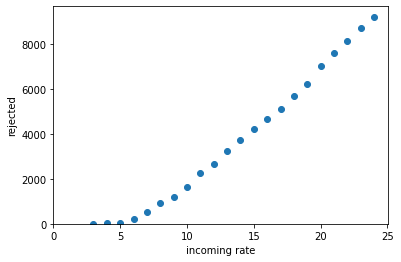

In [60]:
plt.scatter(in_rates, rejected)
plt.xlabel("incoming rate")
plt.ylabel("rejected")
plt.xlim(0,None)
plt.ylim(0,None)

plt.show()

In [113]:
class queue:
    def __init__(self, buffer_size):
        self.q_ = np.empty(buffer_size)
    def insert(self, a):
        self.q_[0] = a
    def print_me(self):
        print(self.q_)

In [24]:
@njit
def distributeOnQueues(queues, n):
    queues_idx = np.arange(queues.shape[0])
    reject = 0
    while n!=0 and np.any(queues==0):
        n -= 1
        rej_flag = True
        q_idx = np.random.randint(N) # rnd queue picker
#         q_idx = weighted_choice(queues_idx, np.exp(np.sum(queues,axis=1)))
#         q_idx = np.argmin(np.sum(queues,axis=1)) # smart queue picker
        
        for neighbour in [0,1,-1]:
            queue = queues[(q_idx+neighbour)%N]
            free_idx = np.where(queue==0)[0]
            if free_idx.size > 0:
                queue[free_idx[-1]] = 1
                rej_flag = False
                break
                
        if rej_flag:
            reject += 1
    
    reject += n
    return reject